# Classificação do Conjunto de Dados Iris

# Importação das bibliotecas e módulos do Python

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate




%matplotlib inline

# Importação do Conjunto de Dados

In [205]:
atributos = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
df = pd.read_csv('iris.csv', names=atributos)
X = df[df.columns.difference(['Class'])].values
y = df['Class'].values
class_names = df['Class'].unique()

# Análise dos dados

In [206]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [20]:
# Dimensão do dataset (linhas; colunas):

print("O conjunto de dados possui como linhas;colunas:", df.shape)

O conjunto de dados possui como linhas;colunas: (150, 5)


In [21]:
# Impressão de apenas as duas primeiras linhas

print(df.head(2)) 

   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa


In [22]:
# Observação das colunas(atributos) presentes no conjunto de dados e análise da quantidade de instâncias,a presença de valores nulos e os tipos dos dados em cada atributo:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Análise dos dados: dispersão

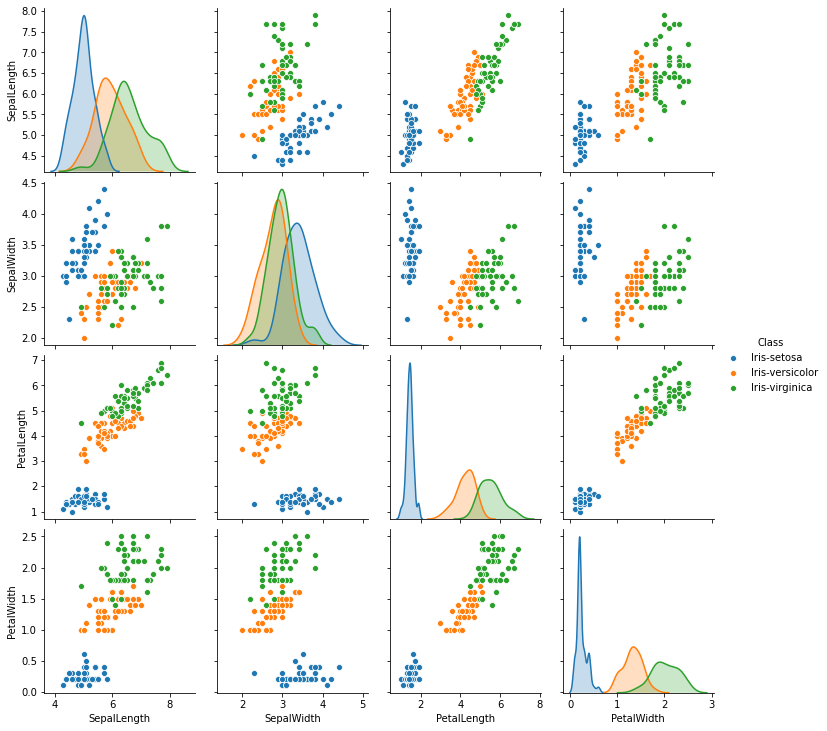

In [82]:
sb_plot = sb.pairplot (df, hue='Class')

In [83]:
sb_plot.savefig("output.png")

# Análise dos dados: distribuição

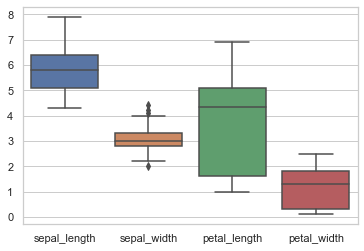

In [84]:
sb.set(style="whitegrid", color_codes=True)
iris = sb.load_dataset("iris")

sb.boxplot(data=iris);

# Análise dos dados: correlação entre variáveis

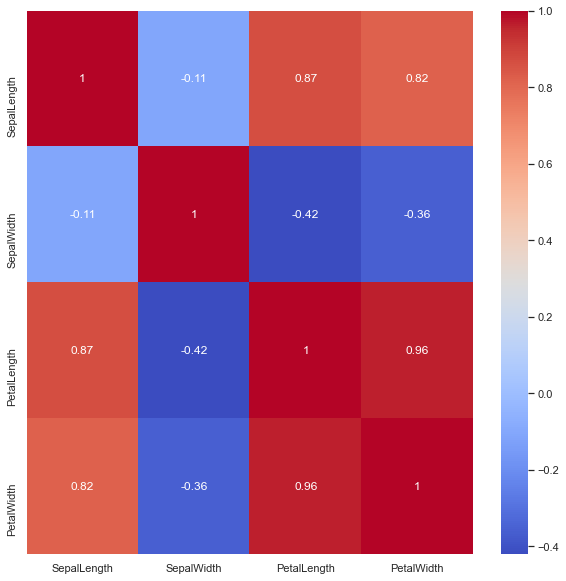

In [85]:
fig, ax = plt.subplots(figsize=(10,10))
plot = sb.heatmap(df.drop('Class', axis=1).corr(), cmap='coolwarm', ax=ax, annot=True)
plt.show()

# Geração e treinamento de Árvores de Classificação

# Conjunto de treinamento = 100% dos dados
Criação e Treinamento do algoritmo indutor (os parâmetros referentes à semente e ao critério foram alterados)

In [65]:
arvore1 = DecisionTreeClassifier(random_state=0, criterion='entropy')
arvore1.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Predição pelo algoritmo indutor previamente treinado (utilizando o conjunto de treinamento) para verificar a acurácia obtida no treinamento:

In [66]:
arvore1.score(X, y)
predicao_treino1= arvore1.predict(X)

Acurácia da árvore de decisão gerada:

In [25]:
acuracia_treino1 = accuracy_score(predicao_treino1,y)
print('\nAcurácia obtida pela Árvore de decisão (100% dados de treinamento): ', acuracia_treino1)


Acurácia obtida pela Árvore de decisão (100% dados de treinamento):  1.0


Matriz de confusão da árvore gerada (descrição dos valores de precisão e erro aparente)

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


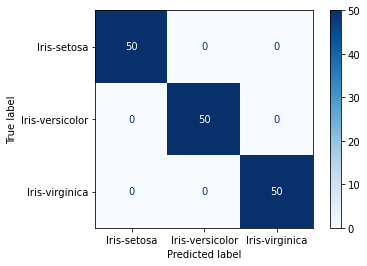

In [26]:
disp = plot_confusion_matrix(arvore1, X, y, display_labels=class_names,cmap=plt.cm.Blues)

print(disp.confusion_matrix)
plt.show()

# Conjunto de treinamento = 80% dos dados
Divisão do conjunto de dados em conjunto de treinamento (80%) e conjunto de teste (20%):

In [183]:
#Para o processo pseudo-aleatório de divisão dos grupos, a semente foi fixada em 0.

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Verificação da divisão do conjunto de dados:

In [184]:
print("(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: ")
X_train.shape, X_test.shape

(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: 


((120, 4), (30, 4))

In [185]:
print("(Quantidade de rótulos) dos conjuntos de treinamento e teste: ")
Y_train.shape, Y_test.shape

(Quantidade de rótulos) dos conjuntos de treinamento e teste: 


((120,), (30,))

Criação e Treinamento do algoritmo indutor (apenas o parâmetro referente ao critério foi alterado)

In [186]:
arvore2 = DecisionTreeClassifier(criterion='entropy')
arvore2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

Predição pelo algoritmo indutor utilizando o conjunto de treinamento (80% dos dados) para observar a acurácia obtida no treinamento:

In [187]:
predicao_arvore2= arvore2.predict(X_train)

Acurácia da árvore de decisão gerada (conjunto de treinamento= 80%)

In [188]:
acuracia_treino2 = accuracy_score(predicao_arvore2,Y_train)
print('\nAcurácia obtida no treinamento da Árvore de decisão (80% dados de treinamento): ', acuracia_treino2)


Acurácia obtida no treinamento da Árvore de decisão (80% dados de treinamento):  1.0


Matriz de confusão da árvore gerada (descrição dos valores de precisão e erro aparente)

[[39  0  0]
 [ 0 37  0]
 [ 0  0 44]]


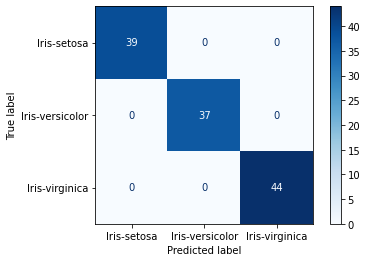

In [189]:
disp2 = plot_confusion_matrix (arvore2, X_train, Y_train, display_labels=class_names,cmap=plt.cm.Blues)

print(disp2.confusion_matrix)
plt.show()

# Em busca da correção da generalização da Árvore de decisão: Poda

In [190]:
print("(Quantidade de rótulos) dos conjuntos de treinamento e teste: ")
Y_train.shape, Y_test.shape

(Quantidade de rótulos) dos conjuntos de treinamento e teste: 


((120,), (30,))

Acurácia:  [0.6916666666666667, 0.9583333333333334, 0.9666666666666667, 0.9916666666666667, 1.0]


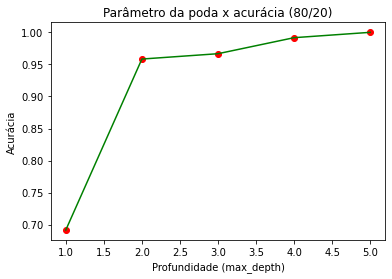

In [191]:
# Visando encontrar um valor ótimo de profundidade da árvore:
max_prof_range = list(range(1, 6))
# Criação de um lista para armazenar os valores de acurácia obtidos com os diferentes limites de profundidade:
acuracia = []
for prof in max_prof_range:
    
    arv2 = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth = prof)
    arv2.fit(X_train, Y_train)
    predicao_arv2 = arv2.predict (X_train)
    acc = accuracy_score (predicao_arv2,Y_train)
    acuracia.append(acc)
    
print("Acurácia: ", acuracia)
    
#Construção do gráfico 2D para avaliar a acurácia em relação ao parâmetro profundidade:

x= max_prof_range
y= acuracia

plt.plot(x, y, color='green')
plt.scatter(x, y, color='red')
plt.title('Parâmetro da poda x acurácia (80/20)')
plt.xlabel('Profundidade (max_depth)')
plt.ylabel('Acurácia')

plt.show()

# Predição do conjunto de teste pela Árvore de decisão podada
Profundidade (max_depth) = 2.0

In [192]:
print("(Quantidade de rótulos) dos conjuntos de treinamento e teste: ")
Y_train.shape, Y_test.shape

(Quantidade de rótulos) dos conjuntos de treinamento e teste: 


((120,), (30,))

In [193]:
arv2 = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth = 2)
arv2.fit(X_train, Y_train)
predicao_arv2 = arv2.predict (X_test)

Acurácia da árvore de decisão gerada (conjunto de teste= 20%)

In [194]:
acuracia_depth2 = accuracy_score(predicao_arv2,Y_test)
print('\nAcurácia obtida na predição feita pela Árvore de decisão (max_depth=2): ', acuracia_depth2)


Acurácia obtida na predição feita pela Árvore de decisão (max_depth=2):  0.9666666666666667


Matriz de confusão da árvore gerada (descrição dos valores de precisão e erro verdadeiro)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


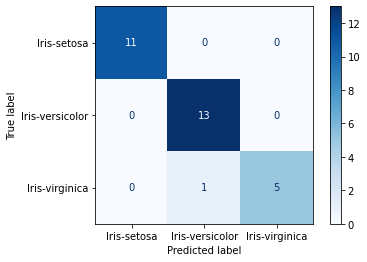

In [195]:
disp3 = plot_confusion_matrix (arv2, X_test, Y_test, display_labels=class_names,cmap=plt.cm.Blues)

print(disp3.confusion_matrix)
plt.show()

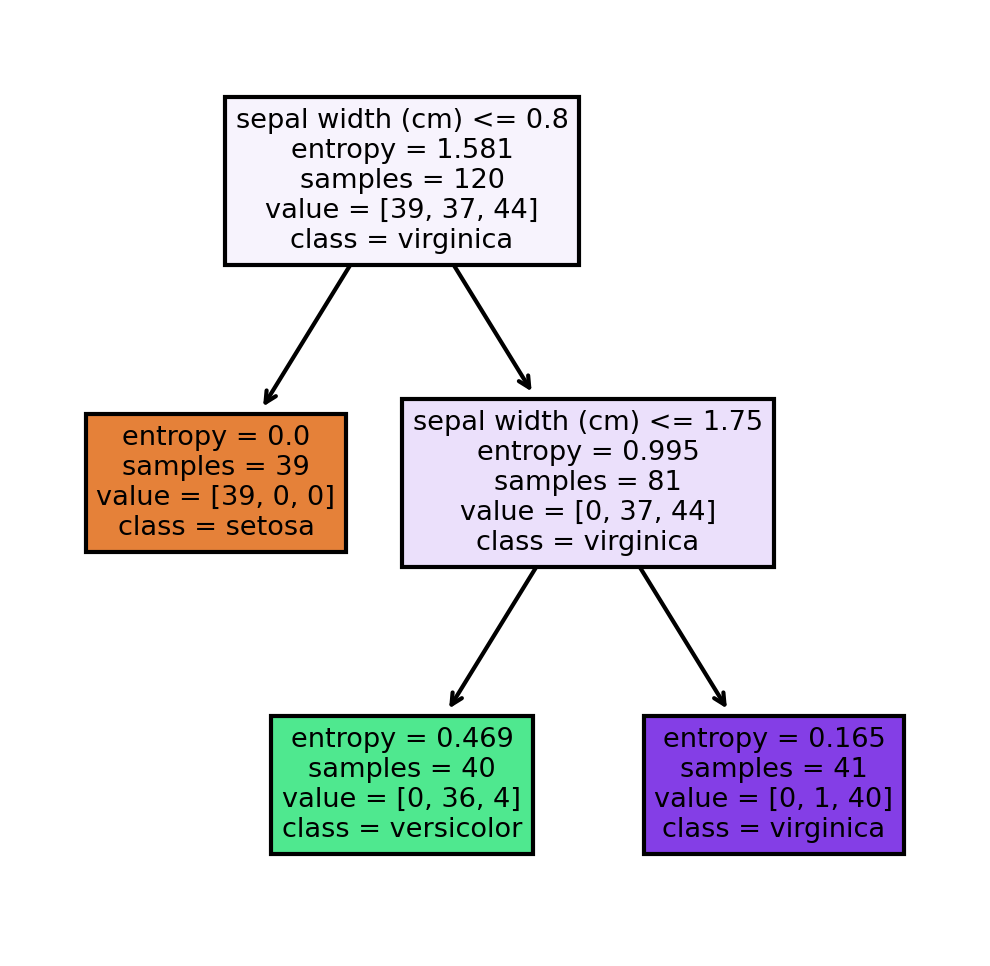

In [196]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(arv2,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('arv2_d2.png')

# Predição do conjunto de teste pela Árvore podada
Profundidade (max_depth:3)

In [197]:
arv2_d3 = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth = 3)
arv2_d3.fit(X_train, Y_train)
predicao_arv2_d3 = arv2_d3.predict (X_test)

Acurácia da árvore de decisão gerada (conjunto de teste= 20%)

In [198]:
acuracia_depth3 = accuracy_score(predicao_arv2_d3,Y_test)
print('\nAcurácia obtida na predição feita pela Árvore de decisão (max_depth=3): ', acuracia_depth3)


Acurácia obtida na predição feita pela Árvore de decisão (max_depth=3):  0.9666666666666667


Matriz de confusão da árvore gerada (descrição dos valores de precisão e erro verdadeiro)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


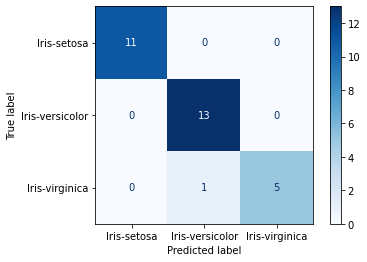

In [199]:
disp3 = plot_confusion_matrix (arv2_d3, X_test, Y_test, display_labels=class_names,cmap=plt.cm.Blues)

print(disp3.confusion_matrix)
plt.show()

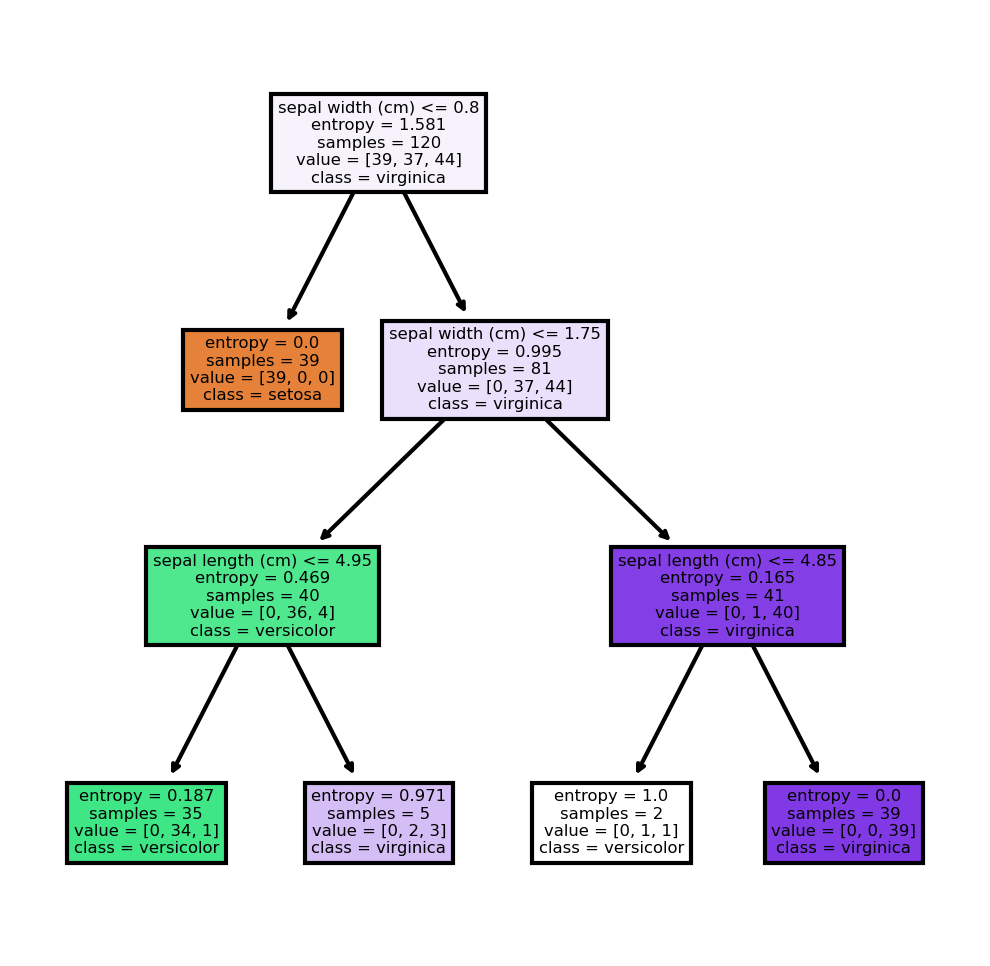

In [200]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(arv2_d3,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('arv2_d3.png')

# Conjunto de treinamento = 20% dos dados
Divisão do conjunto de dados em conjunto de treinamento (20%) e conjunto de teste (80%):

In [169]:
#Para o processo pseudo-aleatório de divisão dos grupos, a semente foi fixada em 0.

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

Verificação da divisão do conjunto de dados:

In [170]:
print("(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: ")
X_train.shape, X_test.shape

(Quantidade de exemplos, quantidade de atributos) dos conjuntos de treinamento e teste: 


((30, 4), (120, 4))

In [171]:
print("(Quantidade de rótulos) dos conjuntos de treinamento e teste: ")
Y_train.shape, Y_test.shape

(Quantidade de rótulos) dos conjuntos de treinamento e teste: 


((30,), (120,))

Criação e Treinamento do algoritmo indutor (apenas o parâmetro referente ao critério foi alterado)

In [172]:
arvore3 = DecisionTreeClassifier(criterion='entropy')
arvore3.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

Predição pelo algoritmo indutor utilizando o conjunto de treinamento (20% dos dados) para observar a acurácia obtida no treinamento:

In [173]:
predicao_arvore3= arvore3.predict(X_train)

Acurácia da árvore de decisão gerada (conjunto de treinamento= 20%)

In [174]:
acuracia_treino3 = accuracy_score(predicao_arvore3,Y_train)
print('\nAcurácia obtida no treinamento da Árvore de decisão (20% dados de treinamento): ', acuracia_treino3)


Acurácia obtida no treinamento da Árvore de decisão (20% dados de treinamento):  1.0


Matriz de confusão da árvore gerada (descrição dos valores de precisão e erro aparente)

[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]


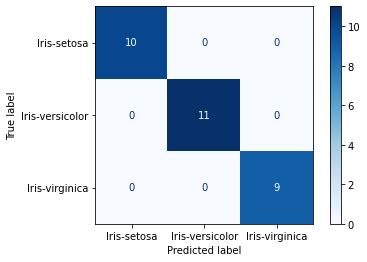

In [175]:
disp3 = plot_confusion_matrix (arvore3, X_train, Y_train, display_labels=class_names,cmap=plt.cm.Blues)

print(disp3.confusion_matrix)
plt.show()

Observação dos níveis criados pelo algoritmo indutor (conjunto de dados=20%):

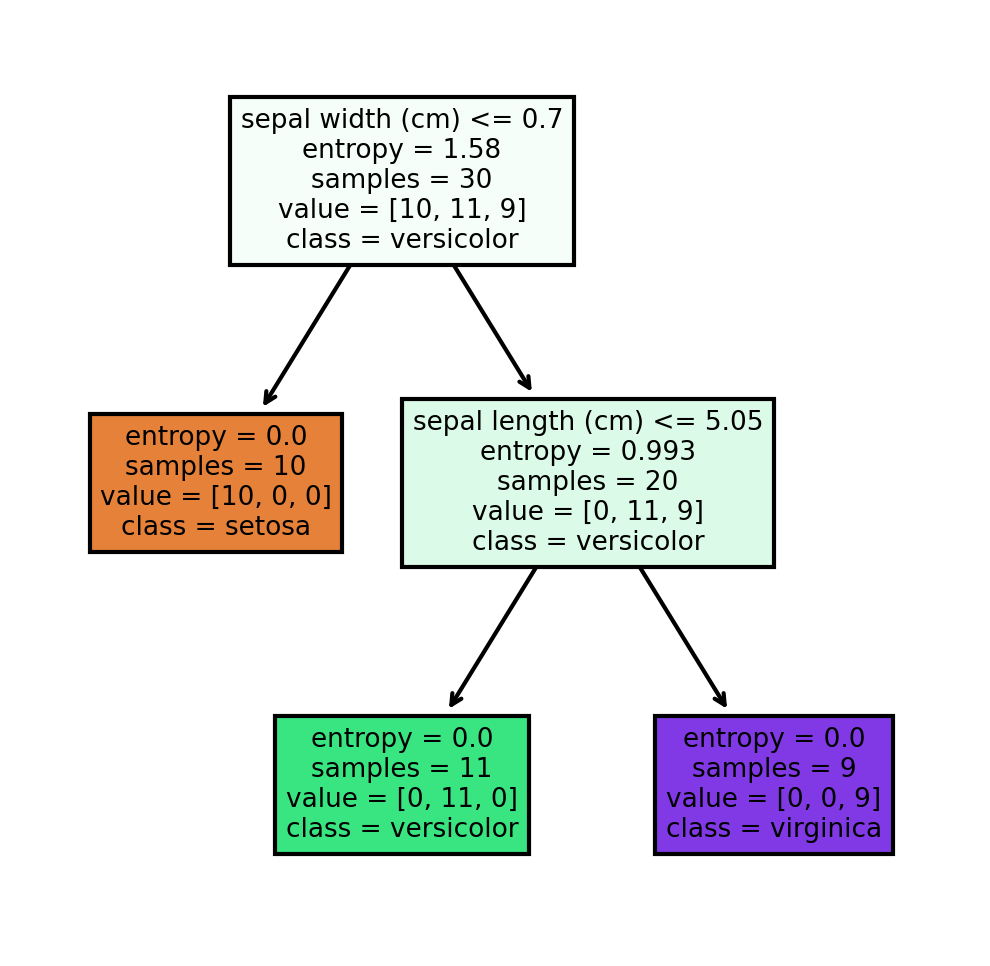

In [176]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(arvore3,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('arv3.png')

# Em busca da correção da generalização da Árvore de decisão: Poda

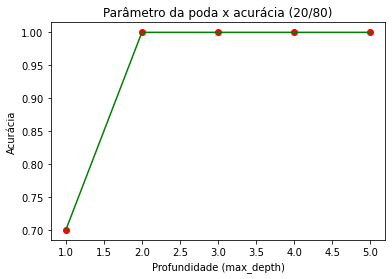

In [177]:
# Visando encontrar um valor ótimo de profundidade da árvore:
max_prof_range = list(range(1, 6))
# Criação de um lista para armazenar os valores de acurácia obtidos com os diferentes limites de profundidade:
acuracia = []
for prof in max_prof_range:
    
    arv3 = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth = prof)
    arv3.fit(X_train, Y_train)
    predicao_arv3 = arv3.predict (X_train)
    acc = accuracy_score (predicao_arv3,Y_train)
    acuracia.append(acc)
    
#Construção do gráfico 2D para avaliar a acurácia em relação ao parâmetro profundidade:

x= max_prof_range
y= acuracia

plt.plot(x, y, color='green')
plt.scatter(x, y, color='red')
plt.title('Parâmetro da poda x acurácia (20/80)')
plt.xlabel('Profundidade (max_depth)')
plt.ylabel('Acurácia')

plt.show()

# Predição do conjunto de teste pela Árvore de Decisão
Considerando o parâmetro max_depth default e conjunto de teste = 80% dos dados

In [178]:
predicao_arv3 = arvore3.predict (X_test)

Acurácia da árvore de decisão gerada (conjunto de teste= 80%)

In [179]:
acuracia_arv3 = accuracy_score(predicao_arv3,Y_test)
print('\nAcurácia obtida na predição feita pela Árvore de decisão: ', acuracia_arv3)


Acurácia obtida na predição feita pela Árvore de decisão:  0.9166666666666666


Matriz de confusão da árvore gerada (descrição dos valores de precisão e erro verdadeiro)

[[40  0  0]
 [ 0 38  1]
 [ 0  9 32]]


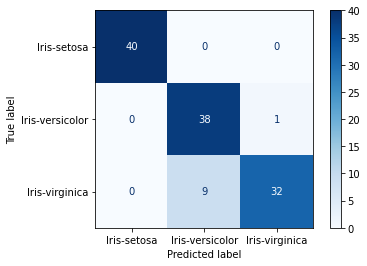

In [106]:
disp4 = plot_confusion_matrix (arvore3, X_test, Y_test, display_labels=class_names,cmap=plt.cm.Blues)

print(disp4.confusion_matrix)
plt.show()

# 10 fold-cross validation:

In [203]:
resultado_cv =cross_val_score(arv2_d3, X, y,scoring='accuracy', cv=10)

print("Média das acurácias obtida pelos 10 folds: ",resultado_cv.mean())

Média das acurácias obtida pelos 10 folds:  0.96
